In [231]:
import math
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.regularizers import l2
from keras.callbacks import EarlyStopping


x = np.empty(1505)
y = np.empty(1505)

x[0]=1.5
y[0]=0

for i in range(1500-1):
    if i<25:
        x[i+1] = x[i] - 0.1*x[i]

    else:
        x[i+1] = x[i] + ((0.2*x[i-25])/(1+pow(x[i-25],10))) - 0.1*x[i]
    y[i+1]=i


#plt.plot(y,x,'-')
#plt.show()  

In [232]:
inp=[]
out=[]

for i in range(300,1500):
    inp.append([x[i-20], x[i-15], x[i-10], x[i-5], x[i]])
    out.append(x[i+5])
    
#print(len(inp)) -> 1200

train_X = np.array(inp[:800])
train_y = np.array(out[:800])

val_X = np.array(inp[800:1000])
val_y = np.array(out[800:1000])

test_X = np.array(inp[1000:])
test_y = np.array(out[1000:])

print(test_X.shape)

(200, 5)


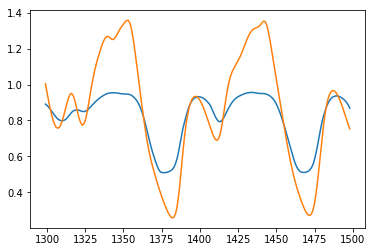

Mean square error:  0.0381021108468


In [233]:
from sklearn.metrics import mean_squared_error

def neural_network(num_nodes,reg_cons,batch_size):

    model = Sequential()
    model.add(Dense(num_nodes,input_dim=5, kernel_regularizer=l2(reg_cons), activation='relu'))
    #model.add(Dense(4, kernel_regularizer=l2(reg_cons), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mae'])
    earlystopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
    model.fit(train_X, train_y, epochs=100, batch_size=batch_size, validation_data=(val_X, val_y),verbose=0, callbacks=[earlystopping], shuffle=False)
    #score = model.evaluate(test_X, test_y, batch_size=1)
    
    predictions = np.array(model.predict(test_X))
    plt.plot(y[1300:1500],predictions,'-')
    plt.plot(y[1300:1500],x[1300:1500],'-')
    plt.show()
    
    ## Större värde på konstanten reg_cons gör att inlärningen blir mer generell och man tar mindre hänsyn till extremerna
    ## Batch size tycks också påverka hur generell inlärningen blir. Varför?
    ## Num nodes får labbas fram för bäst resultat :) 
    
    
    mse = mean_squared_error(predictions, x[1300:1500])
    print("Mean square error: ", mse)
        

neural_network(num_nodes=8, reg_cons=0.00001 , batch_size=32)  


In [234]:
def compare_configs():
        
    for i in range(8):
        #print("Reg 0.01 Nodes: ", i+1,  neural_network(num_nodes=i+1, reg_cons=0.01, batch_size=150))
        print("Reg 0.01 Nodes: ", i+1,  neural_network(num_nodes=i+1, reg_cons=0.01, batch_size=150))
        #print("Reg 1 Nodes: ", i+1,  neural_network(num_nodes=i+1, reg_cons=1, batch_size=150))
        
    print(" ")
    
    for i in range(8):
        #print("Reg 0.01 Nodes: ", i+1,  neural_network(num_nodes=i+1, reg_cons=0.01, batch_size=150))
        print("Reg 0.1 Nodes: ", i+1,  neural_network(num_nodes=i+1, reg_cons=0.1, batch_size=150))
        
    print(" ")
        
    for i in range(8):
        #print("Reg 0.01 Nodes: ", i+1,  neural_network(num_nodes=i+1, reg_cons=0.01, batch_size=150))
        print("Reg 1 Nodes: ", i+1,  neural_network(num_nodes=i+1, reg_cons=1, batch_size=150))
